In [12]:
!pip install geopandas

In [51]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [46]:
covoit = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/3c845ee9-6dba-4e87-8226-eb81b2424113')

In [47]:
pistes_cyclables = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/7daa40cf-edde-4f64-9963-e3092a2e2b30')

In [48]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()
#Méthodes utilisées dans le TP de géopandas
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

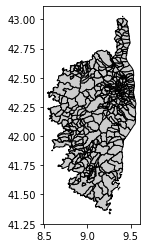

In [104]:
#On index par rapport au numéro des départements
#On ne garde que les deux départements de Corse qui nous intéressent
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes_corses = data_borders.loc[data_borders['dep'].isin(['2A','2B'])].plot(color='0.8', edgecolor='black')

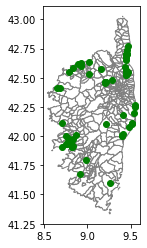

In [165]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
covoit.plot(ax=ax, color='green')
plt.show()

In [80]:
#pas sure que le nombre de places représente vraiment quelque chose : il faudrait avoir des données sur la fréquentation des stations
covoit.sort_values(by = 'places', ascending = False).head(5)

,nom,lumi_re,proprietai,places,commentair,code_posta,adresse,nom_com,source,point_x,point_y,type,pmr,prix,ouverture,tc,velo,geometry
43,U Cimiteriu / Cimetiere,Oui,Collectivite de Corse,204,Projet,20000,Route des Sanguinaires,Ajaccio,Departement de Corse-du-Sud,8.703146,41.907998,P+R,3,0,24/24 7/7,Bus Muvistrada (2),Oui,POINT (8.70315 41.90800)
23,A Mizana / Mezzana,Oui,Collectivite de Corse,50,Existant a labelliser,20167,Gare,Sarrola-Carcopino,Collectivite de Corse,8.834891,41.979264,P+R,2,0,24/24 7/7,Train (CFC Gare de Mezzana),None,POINT (8.83489 41.97926)
59,Le Cintra,Oui,Collectivite de Corse,43,Existant a labelliser,20240,"Av 9 septembre, croisement RT10 - RD144",Ghisonaccia,CC Fium'Orbu Oriente,9.403644,42.011890,Parking,2,0,24/24 7/7,None,None,POINT (9.40364 42.01189)
60,Socordis,Oui,Collectivite de Corse,35,Existant a labelliser,20090,Croisement RT20 - RT21 - RT40,Ajaccio,Collectivite de Corse,8.801744,41.930794,Aire de covoiturage,0,0,24/24 7/7,Bastiabus,None,POINT (8.80174 41.93079)
33,Gare Ponte Leccia,Oui,Collectivite de Corse,34,Existant a labelliser,20218,Ponte-Leccia,Morosaglia,Departement de Haute-Corse,9.204354,42.465006,P+R,2,0,24/24 7/7,Train (CFC Ponte-Leccia),None,POINT (9.20435 42.46501)


In [90]:
covoit.groupby('nom_com').sum().sort_values(by = 'places', ascending = False).head(5)

,places,point_x,point_y,pmr
nom_com,,,,
Ajaccio,239,35.017638,167.702033,3
Sarrola-Carcopino,78,35.278846,167.867590,6
Bastia,49,66.140063,298.856269,2
Ghisonaccia,43,18.810346,84.029921,2
Morosaglia,34,36.828690,169.848913,2


In [103]:
covoit.groupby('type').count()
#P+R = Lieu aménagé à proximité d'un arrêt de transport public, 
#destiné à inciter un automobiliste à garer son véhicule pour emprunter ensuite un moyen de transport en commun.

,nom,lumi_re,proprietai,places,commentair,code_posta,adresse,nom_com,source,point_x,point_y,pmr,prix,ouverture,tc,velo,geometry
type,,,,,,,,,,,,,,,,,
Aire de covoiturage,5,3,5,5,5,5,5,5,5,5,5,5,3,3,3,0,5
Delaisse routier,7,3,7,7,7,7,7,7,7,7,7,7,6,5,4,0,7
P+R,8,5,8,8,8,8,7,8,8,8,8,8,8,8,8,1,8
Parking,30,15,30,30,30,30,29,30,30,30,30,30,24,24,9,0,30
Supermarche,14,4,14,14,14,14,14,14,14,14,14,14,14,12,3,0,14


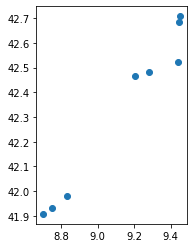

In [160]:
covoit[covoit['type'].isin(['P+R'])].plot()

In [147]:
#aires avec vélos
velo = covoit[covoit['velo'].isin(['Oui'])]

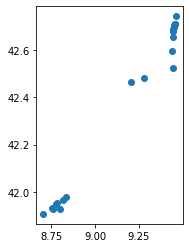

In [159]:
#covoit avec intermodalité : on enlève les NaN et les sans intermodalité
covoit.groupby('tc').count()
intermod = covoit[covoit['tc'].notna()]
intermod = intermod[~intermod['tc'].isin(['Non'])]
intermod.plot()

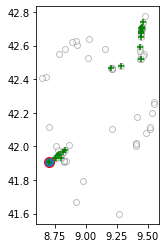

In [157]:
#station avec vélos/train/bus
fig, ax = plt.subplots()
covoit.plot(ax=ax,color = 'white', edgecolor = 'grey', alpha = 0.5)
velo.plot(ax=ax, edgecolor = "red", markersize = 100)
intermod.plot(ax=ax, color = 'green', marker = '+')
plt.show()

**Que ce soit sur P+R ou sur train/bus : les aires concernées sont très centrées sur Ajaccio/Bastia et le reste de l'île est assez "vide"**






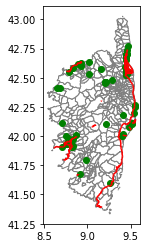

In [163]:
#on essaye de voir les endroits où il y a des pistes cyclables et des aires de covoit : 
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
pistes_cyclables.plot(ax=ax, color='red', markersize=5)
covoit.plot(ax=ax, color='green')
plt.show()

In [193]:
#on essaye de ne garder que les endroit où il y a les deux : 
ville = covoit['nom_com']
pistes = pistes_cyclables[pistes_cyclables['nom_commune'].isin(ville)]
villes = pistes_cyclables['nom_commune']
cocovoit = covoit[covoit['nom_com'].isin(villes)]
#on pourrait trouver une manière plus élégante de le faire en prenant l'intersection des listes correspondant au nom des communes je pense

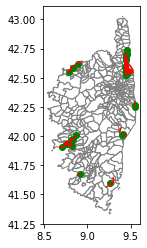

In [195]:
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
pistes.plot(ax=ax, color='red', markersize=5)
cocovoit.plot(ax=ax, color='green')
plt.show()

In [233]:
#j'ai tenté un merge pour la forme : 
both = covoit.merge(pistes_cyclables, how = 'inner', left_on = 'nom_com', right_on = 'nom_commune')
del both['nom_commune']
both.groupby('nom_com').count()
#nous donne la liste des villes où il y a à la fois des aires de covoit et des pistes cyclables

,nom,lumi_re,proprietai,places,commentair,code_posta,adresse,source,point_x,point_y,type,pmr,prix,ouverture,tc,velo,geometry_x,code_epci,id_iti,name,statut,datesaisie,orig_fid,code_reg,code_com,avancement,length,gestion,revetement,code_dep,nom_commune,sensunique,fictif,propriete,jalon_tour,an_ouvert,jalon_dir,geometry_y
nom_com,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,384,384,384,384,384,384,384,384,384,384,384,384,384,384,384,96,384,384,196,268,380,384,384,384,384,384,384,112,340,384,384,308,276,84,16,160,16,384
Bastelicaccia,6,0,6,6,6,6,6,6,6,6,6,6,6,6,0,0,6,6,5,0,6,6,6,6,6,6,6,0,6,6,6,2,2,0,0,0,0,6
Bastia,518,74,518,518,518,518,518,518,518,518,518,518,518,518,518,0,518,518,35,350,462,518,518,518,518,518,518,266,308,518,518,371,196,56,0,35,0,518
Biguglia,26,0,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,6,24,25,26,26,26,26,26,26,1,20,26,26,25,7,1,0,1,0,26
Borgo,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,0,26,26,3,22,24,26,26,26,26,26,26,3,20,26,26,24,7,3,0,3,0,26
Calvi,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,3,3,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,0,0,0,0,3
Corbara,5,0,5,5,5,5,5,5,5,5,5,5,0,0,0,0,5,5,4,2,5,5,5,5,5,5,5,0,5,5,5,5,5,0,0,0,0,5
Furiani,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0,16,16,2,11,10,16,16,16,16,16,16,1,10,16,16,12,10,0,0,1,0,16
Ghisonaccia,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0,0,4,4,2,2,2,4,4,4,4,4,4,0,2,4,4,4,2,0,0,0,0,4


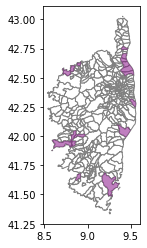

In [239]:
#on affiches les communes où il y a à la fois des aires de covoiturage et des pistes cyclables
communes = communes_borders[communes_borders['nom'].isin(both['nom_com'])]
fig, ax = plt.subplots()
data_borders.loc[data_borders['dep'].isin(['2A', '2B'])].plot(ax=ax, color='white', edgecolor='0.5')
communes.plot(ax=ax, color = 'purple', alpha = 0.5)
plt.show()